In [14]:
import matplotlib as plt
import numpy as np
import pandas as pd

from joblib import load

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [61]:
logreg_import = load('logreg_poly.joblib')
neural_import = load('nn.joblib')
gradient_import = load('gbc.joblib')
decitree_import = load('dtc.joblib')
randofor_import = load('rfc.joblib')
stocha_import = load('sgdc.joblib')
linsvm_import = load('lsvc.joblib')
passaggr_import = load('pac.joblib')
ridgy_import = load('rdgc.joblib')
hisgra_import = load('hgbc_poly.joblib')

poly_std_train = np.load('/Users/mk2/Desktop/iMa/Model/std_pca_poly_train.npy')
poly_std_test = np.load('/Users/mk2/Desktop/iMa/Model/std_pca_poly_test.npy')

train_group1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/train_group1.csv',index_col=[0,1])
test_group1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/test_group1.csv',index_col=[0,1])

train_label1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/train_label1.csv',index_col=[0,1])
test_label1 = pd.read_csv('/Users/mk2/Desktop/iMa/Model/test_label1.csv',index_col=[0,1])

In [64]:
from sklearn.ensemble import StackingClassifier

estimators = (logreg_import, hisgra_import)

estimators = [
    ('log', logreg_import),
    ('hgbc', hisgra_import),
    ('nn', neural_import),
    ('gbc', gradient_import),
    ('dtc', decitree_import),
    ('rfc', randofor_import),
    ('sgdc', stocha_import),
    ('lsvc', linsvm_import),
    ('pac', passaggr_import),
    ('rdgc', ridgy_import),
]

stacky_class = StackingClassifier(estimators,final_estimator= randofor_import, cv=None, 
                   stack_method='auto', n_jobs=None, passthrough=False, verbose=0)

In [65]:
stacky_class.fit(poly_std_train,train_label1)
prediction_stacky = stacky_class.predict(poly_std_test)
print(classification_report(test_label1, prediction_stacky))

/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mk2/opt/anaconda3/envs/no_base/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/mk2/op

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     11526
           1       0.29      0.13      0.18      3618

    accuracy                           0.72     15144
   macro avg       0.53      0.52      0.51     15144
weighted avg       0.65      0.72      0.67     15144



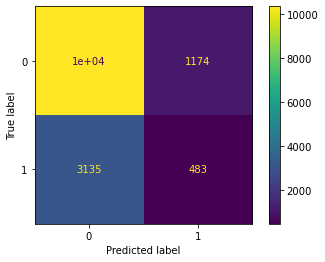

In [66]:
cm_stacky = confusion_matrix(test_label1, prediction_stacky)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacky)
disp.plot() 